# Introduccion

Estos datos fueron tomados de [Moro et al., 2011] S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October,
2011. EUROSIS. Y fueron adaptados mínimamente. Son datos relacionados con campañas de marketing directo de una institución bancaria (de Portugal).

* Las campañas de marketing están basadas en llamadas telefónicas. Frecuentemente se contacta al mismo cliente más de una vez para saber si se suscribirá o no al producto (depósito a término/plazo fijo)
* Trabajaremos con un conjunto de ejemplos correspondientes a los contactos de una campaña (de Marzo de 2008 a Noviembre de 2010 )
* Los datos están ordenados cronológicamente.
* El objetivo de la clasificación es predecir si el cliente se suscribirá a un depósito a término o no

## Las variables de entrada:

* Datos de clientes del banco: 

1. edad (numérico)
2. categoria laboral (categórico)
3. estado civil (categórico)
4. nivel de educación (categórico)
5. deuda: tiene crédito en mora? (Binario: sí/no)
6. balance: balance promedio anual, en euros (numérico)
7. vivienda: tiene crédito de vivienda? (Binario: sí/no)
8. préstamo: tiene préstamo personal? (Binario: sí/no)

* Datos relacionados con el último contacto de la campaña actual:

9. contacto: tipo de comunicación de contacto (categórica)
10. día: último día de contacto (numérico)
11. duración: en segundos (numérico)

* Datoselacionados con campaña actual y anteriores: 

12. cant actual: número de contactos realizados durante esta campaña y para este cliente (numérica, incluye último contacto)
13. días entre: número de días que pasaron desde el último en contacto de una campaña anterior (numérico, -1 significa cliente no fue contactado previamente)
14. cant previa: número de contactos realizados previos a esta campaña para este cliente (numérica)
15. resultado ant: resultado de la campaña de comercialización anterior (categórica: "otro", el "fracaso" "desconocido", el "éxito")
16. y : Objetivo/Target, el cliente ha tenido un depósito a plazo? (Binario: "sí", "no")
    
## Matriz de Costos
Supongamos que la suscripción de un cliente a un depósito a término le genera al banco una ganancia de $850 
y el costo de realizar la campaña es de $100 por cliente contactado. Tendríamos una matríz de costo como 
la siguiente:

# Resumen del Data Set:


In [33]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
#matplotlib.style.use('ggplot')
plt.style.use('seaborn-deep')
%matplotlib inline

import pandas as pd
df = pd.read_csv("banco2.csv")
df['y'].replace({'si': 1, 'no': 0}, inplace=True)
print(df.shape)
df.head(10)

(36115, 18)


edad   categlaboral       estadocivil           niveleducacion deuda  \
0    58        gestion            casado  universitario/terciario    no   
1    44        tecnico           soltero               secundario    no   
2    33     empresario            casado               secundario    no   
3    47       operario            casado              desconocido    no   
4    35        gestion            casado  universitario/terciario    no   
5    28        gestion           soltero  universitario/terciario    no   
6    42     empresario  divorciado/viudo  universitario/terciario    si   
7    58       jubilado            casado                 primario    no   
8    41  administrador  divorciado/viudo               secundario    no   
9    29  administrador           soltero               secundario    no   

   balance vivienda prestamo     contacto  dia  mes  anio  duracion  \
0     2143       si       no  desconocido    5  may  2008       261   
1       29       si       no  desconocido    5  may  2008       151   
2        2       si       si  desconocido    5  may  2008        76   
3     1506       si       no  desconocido    5  may  2008        92   
4      231       si       no  desconocido    5  may  2008       139   
5      447       si       si  desconocido    5  may  2008       217   
6        2       si       no  desconocido    5  may  2008       380   
7      121       si       no  desconocido    5  may  2008        50   
8      270       si       no  desconocido    5  may  2008       222   
9      390       si       no  desconocido    5  may  2008       137   

   cantactual  diasentre  cantprevia resultadoant  y  
0           1         -1           0  desconocido  0  
1           1         -1           0  desconocido  0  
2           1         -1           0  desconocido  0  
3           1         -1           0  desconocido  0  
4           1         -1           0  desconocido  0  
5           1         -1           0  desconocido  0  
6           1         -1           0  desconocido  0  
7           1         -1           0  desconocido  0  
8           1         -1           0  desconocido  0  
9           1         -1           0  desconocido  0

In [13]:
#Estas lineas imprimen un resumen de los datos numericos
bins = {}
summary = df.describe()
summary = summary.transpose()
summary.head()

count         mean          std     min     25%     50%     75%  \
edad      36115.0    40.952430    10.670266    18.0    33.0    39.0    48.0   
balance   36115.0  1369.858784  3083.722929 -8019.0    72.0   447.0  1433.0   
dia       36115.0    15.811602     8.322982     1.0     8.0    16.0    21.0   
anio      36115.0  2008.447903     0.604407  2008.0  2008.0  2008.0  2009.0   
duracion  36115.0   258.008418   256.699838     0.0   103.0   180.0   319.0   

               max  
edad          95.0  
balance   102127.0  
dia           31.0  
anio        2010.0  
duracion    4918.0

Datos Numéricos:  ['edad', 'balance', 'dia', 'anio', 'duracion', 'cantactual', 'diasentre', 'cantprevia'] [0, 5, 9, 11, 12, 13, 14, 15]
Datos Categéricos:  ['categlaboral', 'estadocivil', 'niveleducacion', 'deuda', 'vivienda', 'prestamo', 'contacto', 'mes', 'resultadoant', 'y'] [1, 2, 3, 4, 6, 7, 8, 10, 16, 17]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


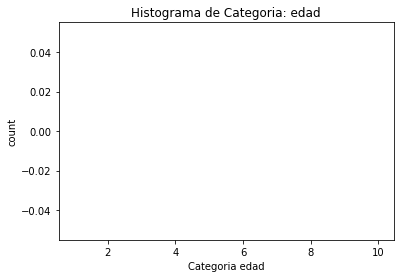

TypeError: list indices must be integers or slices, not str

In [20]:
df.head()
#Analizo solo los datos numericos: Histogramas


list_num = [df.columns[j] for j,i in enumerate(df.dtypes) if i == "int64"]
list_cat = [ j for j in df.columns if not (j in list_num )]

index_cat = [ i for i,j in enumerate(df.columns) if not (j in list_num )]
index_num = [ i for i,j in enumerate(df.columns) if j in list_num ]

print("Datos Numéricos: ", list_num, index_num)
print("Datos Categéricos: ", list_cat, index_cat)

#bins = np.linspace(0, 5, 10)
bins = [1,2,3,4,5,6,7,8,9,10]; print(bins)
i = index_num[0]
#for n,i in enumerate(index_num):
#plt.xlim([0, 100])
plt.hist(df[df.columns[i]], bins=bins, alpha=0.3, color='g')
#histtype is 'step' or 'stepfilled'
plt.title('Histograma de Categoria: ' + df.columns[i])
plt.xlabel('Categoria ' + df.columns[i])
plt.ylabel('count')
plt.show()
bins[df.columns[i]]= [1,2,3,4,5,6,7,8,9,10]


                      no  yes  total
desempleado          870  173   1043
estudiante           528  214    742
operario            7149  570   7719
administrador       3619  501   4120
tecnico             5408  672   6080
jubilado            1438  409   1847
servicio domestico   900   92    992
independiente       1113  158   1271
servicios           3043  292   3335
desconocido          202   29    231
                      no   yes  total      yes%       no%
estudiante           528   214    742  0.288410  0.711590
jubilado            1438   409   1847  0.221440  0.778560
desempleado          870   173   1043  0.165868  0.834132
gestion             6500  1049   7549  0.138959  0.861041
desconocido          202    29    231  0.125541  0.874459
independiente       1113   158   1271  0.124312  0.875688
administrador       3619   501   4120  0.121602  0.878398
tecnico             5408   672   6080  0.110526  0.889474
servicio domestico   900    92    992  0.092742  0.907258
servicios    

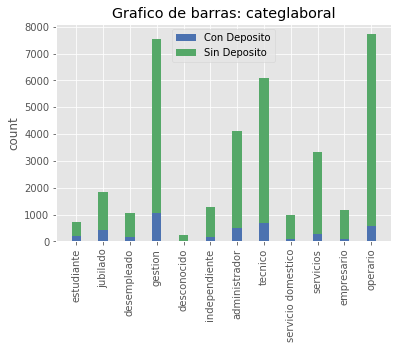

In [34]:
cate = df.columns[1]
scate = set(df[cate])
N= len(scate)
ind = np.arange(N)    # the x locations for the groups
width = 0.35
yescate = list((len(df[(df['y']==1) & (df[cate]==s)]) for s in scate))
nocate = list((len(df[(df['y']==0) & (df[cate]==s)]) for s in scate))

dcate = pd.DataFrame({'yes': pd.Series(yescate, index = [s for s in scate]),
                     'no' : pd.Series(nocate, index = [s for s in scate])})
dcate['total']= dcate['yes']+dcate['no']


print(dcate.head(10))
dcate['yes%'] = dcate['yes']/dcate['total']
dcate['no%'] = dcate['no']/dcate['total']
dcate = dcate.sort_values(['yes%'], ascending=False)
print(dcate.head(10))

yescate = dcate['yes']
nocate = dcate['no']
index_list = dcate.index.tolist()

p1 = plt.bar(ind, yescate, width)#, yerr=menStd)
p2 = plt.bar(ind, nocate, width, bottom=yescate)#, yerr=womenStd)
plt.xticks(ind, index_list )
locs, labels = plt.xticks() #!!
plt.setp(labels, rotation=90) #!!
plt.title('Grafico de barras: ' + cate)
plt.legend((p1[0], p2[0]), ('Con Deposito', 'Sin Deposito'))
plt.ylabel('count')
plt.show()

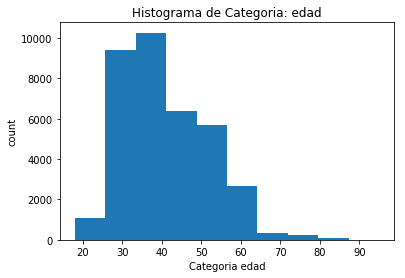

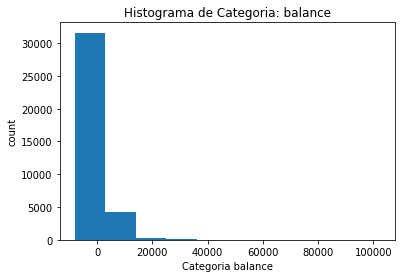

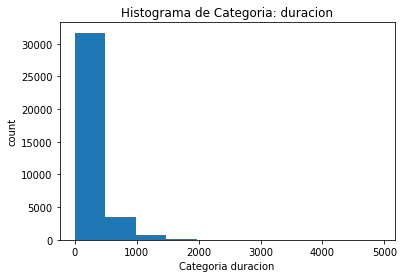

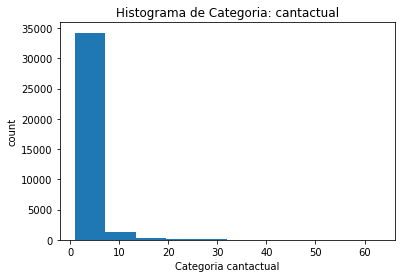

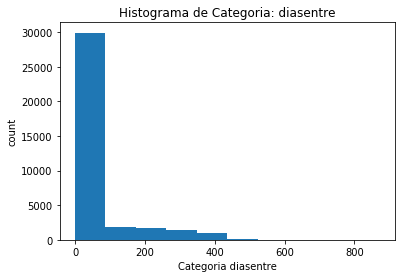

In [28]:
#Analizo solo los datos numericos: Histogramas
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
#matplotlib.style.use('ggplot')
#plt.style.use('seaborn-deep')
%matplotlib inline

#bins = {} 
#bins['edad'] = np.linspace(2, 100, 50) 
for n,i in enumerate(index_num):
    #plt.xlim([0, 100])
    plt.hist(df[df.columns[i]])#, bins=bins, alpha=0.5)
    plt.title('Histograma de Categoria: ' + df.columns[i])
    plt.xlabel('Categoria ' + df.columns[i])
    plt.ylabel('count')
    plt.show()

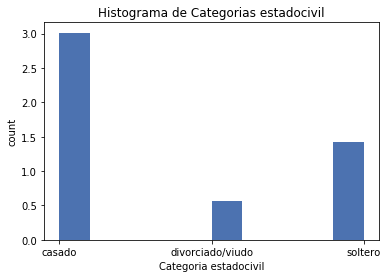

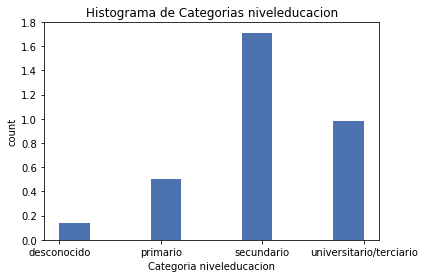

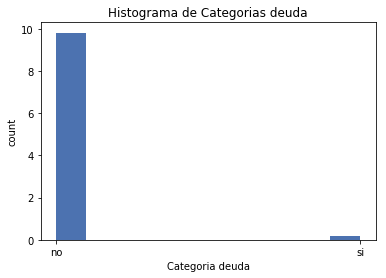

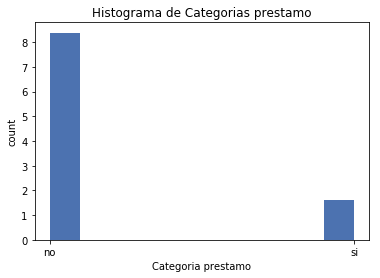

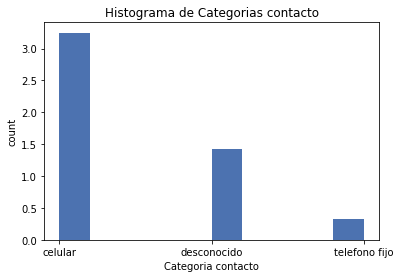

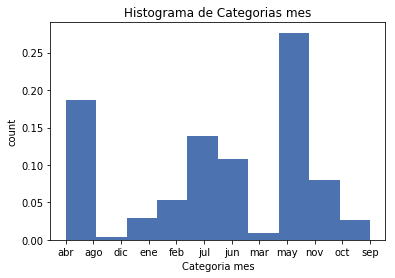

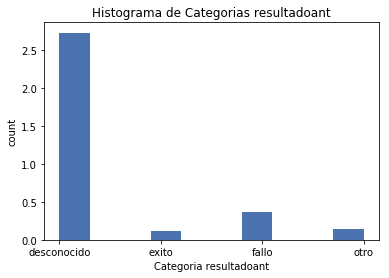

In [84]:
for i in index_cat[1:]:
    bins = np.arange(0, 100, 2) # fixed bin size
    #plt.xlim([0, 100])
    plt.hist(df[df.columns[i]], density=True, align='mid', rwidth=1)#, bins=bins, alpha=0.5)
    #locs, labels = plt.xticks()
    #plt.setp(label, rotation=45)
    plt.title('Histograma de Categorias ' + df.columns[i])
    plt.xlabel('Categoria ' + df.columns[i])
    plt.ylabel('count')
    #plt.set_xticklabels(names,rotation=45)
    plt.show()

Ahora un ejemplo de las cosas que se pueden hacer. Debajo se grafica un histograma de numeros de registros por categorial laboral. Primero se construye un dataframe alternativo 'dg' y luego se grafica el histograma horizontal. Se utiliza la opcion 'barh' que formalmente es un grafico de barras horizontal y no un histograma. Mas abajo el ejemplo de un histograma.

In [6]:
names = df[df.columns[1]]
names = names.unique()
names = names.tolist()

count = [len(df.loc[ df[df.columns[1]] == names[n] ]) for n in range(len(names)) ]
#print(names, count)
dg = pd.DataFrame({ 'Cat. Laboral':names, 's1': count})
dg = dg[["Cat. Laboral","s1"]]
dg.set_index(["Cat. Laboral"],inplace=True)
dg.plot(kind='barh',alpha=0.85, rot=0)
#plt.xlabel(df.columns[1])
plt.title('Categorial laboral')
plt.show()

In [7]:
df['categlaboral'].hist(by=df['estadocivil'], xrot=90, sharey=True, histtype='bar')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f08b1e67278>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f08aefda780>]], dtype=object)

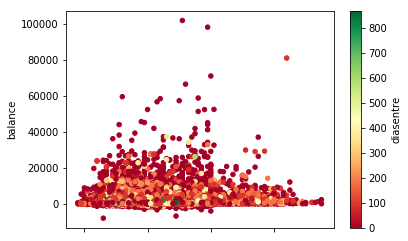

In [8]:
df.plot.scatter(x=0, y=5, c='diasentre', cmap='RdYlGn', s=20); # Diverging color map 